In [3]:
import pandas as pd

In [5]:
import numpy as np

In [7]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('olist_customers_dataset.csv')

In [10]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,Deveriam embalar melhor o produto. A caixa vei...
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,5,"Só achei ela pequena pra seis xícaras ,mais é ..."


In [13]:
df.shape

(115609, 33)

In [15]:
df.dtypes

order_id                          object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_category_name             object
product_name_lenght              float64
product_descript

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115609 non-null  object 
 1   customer_id                    115609 non-null  object 
 2   order_status                   115609 non-null  object 
 3   order_purchase_timestamp       115609 non-null  object 
 4   order_approved_at              115595 non-null  object 
 5   order_delivered_carrier_date   114414 non-null  object 
 6   order_delivered_customer_date  113209 non-null  object 
 7   order_estimated_delivery_date  115609 non-null  object 
 8   payment_sequential             115609 non-null  int64  
 9   payment_type                   115609 non-null  object 
 10  payment_installments           115609 non-null  int64  
 11  payment_value                  115609 non-null  float64
 12  customer_unique_id            

In [19]:
df.review_score.unique()


array([4, 5, 3, 1, 2])

In [21]:
df.describe()

,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000
mean,1.093747,2.946233,172.387379,35061.537597,1.194535,120.619850,20.056880,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,4.034409
std,0.729849,2.781087,265.873969,29841.671732,0.685926,182.653476,15.836184,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,1.385584
min,1.000000,0.000000,0.000000,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000
25%,1.000000,1.000000,60.870000,11310.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,4.000000
50%,1.000000,2.000000,108.050000,24241.000000,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,5.000000
75%,1.000000,4.000000,189.480000,58745.000000,1.000000,134.900000,21.210000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,5.000000
max,29.000000,24.000000,13664.080000,99980.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,5.000000


In [23]:
df.isnull().sum()


order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   14
order_delivered_carrier_date      1195
order_delivered_customer_date     2400
order_estimated_delivery_date        0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name                0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty       

In [25]:
df["review_comment_message"].fillna("No review", inplace=True)

/tmp/ipykernel_138994/2398843226.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["review_comment_message"].fillna("No review", inplace=True)


In [27]:
df.drop(['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','product_weight_g','product_length_cm','product_height_cm','product_width_cm'], axis=1, inplace = True)

In [29]:
df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_category_name_english    0
review_score                     0
review_comment_message           0
dtype: int64

In [31]:
df.drop(['customer_zip_code_prefix','order_item_id'], axis=1, inplace=True)

In [33]:
df_num = df.select_dtypes(include=[np.number])

In [35]:
df_cat = df.select_dtypes(include=['object','category'])

In [37]:
for x in df_cat.columns.to_list():
    print(x, df_cat[x].nunique())


order_id 96516
customer_id 96516
order_status 7
order_purchase_timestamp 95989
order_estimated_delivery_date 449
payment_type 4
customer_unique_id 93396
customer_city 4093
customer_state 27
product_id 32171
seller_id 3028
shipping_limit_date 91386
product_category_name 71
product_category_name_english 71
review_comment_message 35177


In [40]:
df_num.describe()

,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,review_score
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000
mean,1.093747,2.946233,172.387379,120.619850,20.056880,48.766541,785.808198,2.205373,4.034409
std,0.729849,2.781087,265.873969,182.653476,15.836184,10.034187,652.418619,1.717771,1.385584
min,1.000000,0.000000,0.000000,0.850000,0.000000,5.000000,4.000000,1.000000,1.000000
25%,1.000000,1.000000,60.870000,39.900000,13.080000,42.000000,346.000000,1.000000,4.000000
50%,1.000000,2.000000,108.050000,74.900000,16.320000,52.000000,600.000000,1.000000,5.000000
75%,1.000000,4.000000,189.480000,134.900000,21.210000,57.000000,983.000000,3.000000,5.000000
max,29.000000,24.000000,13664.080000,6735.000000,409.680000,76.000000,3992.000000,20.000000,5.000000


In [42]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
df_num_std = pd.DataFrame(standardizer.fit_transform(df_num))


In [44]:
df_num_std.columns = df_num.columns.to_list()

In [46]:
df_num_std.describe()

,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,review_score
count,1.156090e+05,1.156090e+05,1.156090e+05,1.156090e+05,1.156090e+05,1.156090e+05,1.156090e+05,1.156090e+05,1.156090e+05
mean,4.541957e-17,4.376012e-17,1.573398e-17,5.900242e-17,2.114253e-16,7.055706e-17,7.276965e-17,-5.088958e-17,-2.159734e-16
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-1.284478e-01,-1.059386e+00,-6.483829e-01,-6.557245e-01,-1.266528e+00,-4.361761e+00,-1.198328e+00,-7.017108e-01,-2.189996e+00
25%,-1.284478e-01,-6.998130e-01,-4.194388e-01,-4.419308e-01,-4.405676e-01,-6.743516e-01,-6.741225e-01,-7.017108e-01,-2.483375e-02
50%,-1.284478e-01,-3.402398e-01,-2.419855e-01,-2.503103e-01,-2.359720e-01,3.222457e-01,-2.848003e-01,-7.017108e-01,6.968869e-01
75%,-1.284478e-01,3.789065e-01,6.428871e-02,7.818199e-02,7.281586e-02,8.205443e-01,3.022487e-01,4.625938e-01,6.968869e-01
max,3.823583e+01,7.570370e+00,5.074491e+01,3.621288e+01,2.460345e+01,2.714079e+00,4.914338e+00,1.035918e+01,6.968869e-01


In [48]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_array = encoder.fit_transform(df_cat[['order_status', 'payment_type','customer_state']])
encoded_df = pd.DataFrame(
    encoded_array,
    columns=encoder.get_feature_names_out(['order_status', 'payment_type','customer_state'])
)
df_encoded = pd.concat([df_num_std, encoded_df], axis=1)


In [50]:
df_encoded.columns.to_list()

['payment_sequential',
 'payment_installments',
 'payment_value',
 'price',
 'freight_value',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'review_score',
 'order_status_canceled',
 'order_status_delivered',
 'order_status_invoiced',
 'order_status_processing',
 'order_status_shipped',
 'order_status_unavailable',
 'payment_type_credit_card',
 'payment_type_debit_card',
 'payment_type_voucher',
 'customer_state_AL',
 'customer_state_AM',
 'customer_state_AP',
 'customer_state_BA',
 'customer_state_CE',
 'customer_state_DF',
 'customer_state_ES',
 'customer_state_GO',
 'customer_state_MA',
 'customer_state_MG',
 'customer_state_MS',
 'customer_state_MT',
 'customer_state_PA',
 'customer_state_PB',
 'customer_state_PE',
 'customer_state_PI',
 'customer_state_PR',
 'customer_state_RJ',
 'customer_state_RN',
 'customer_state_RO',
 'customer_state_RR',
 'customer_state_RS',
 'customer_state_SC',
 'customer_state_SE',
 'customer_state_SP',
 'customer_state_T

In [52]:
df.drop(['order_id'], axis=1, inplace=True)

<Axes: >

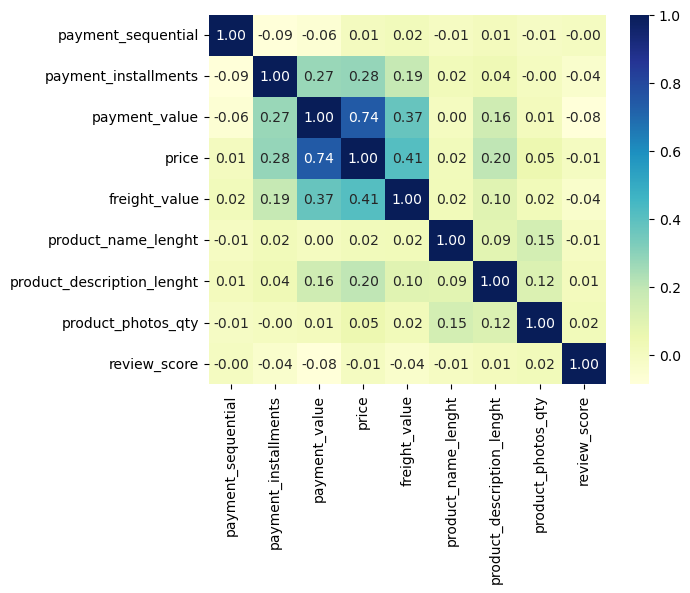

In [26]:
sns.heatmap(df_num.corr(), annot=True, fmt=".2f", cmap="YlGnBu")

In [27]:
#df_encoded.drop(['price'], axis = 1, inplace = True)

In [54]:
from sklearn.model_selection import train_test_split

In [56]:
x = df_encoded.drop('review_score', axis = 1)
y = df_encoded['review_score']

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=1)

In [60]:
from sklearn.linear_model import LinearRegression

In [62]:
x_train.head()

,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,order_status_canceled,order_status_delivered,...,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO
16973,-0.128448,0.738480,0.381734,0.730239,-0.011169,0.720885,2.409800,2.209051,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17372,-0.128448,-0.699813,-0.269405,-0.189594,-0.333850,-0.275713,-0.623541,-0.119559,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10626,-0.128448,-0.699813,-0.080254,0.078729,-0.253022,-2.767206,-0.511649,-0.701711,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
35829,-0.128448,0.378907,-0.193880,-0.121432,0.147961,0.023266,-0.614345,-0.701711,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14201,-0.128448,1.098053,0.705309,1.173649,0.307090,0.820544,-0.634271,1.044746,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [34]:
y_pred = lr.predict(x_test)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
print('r2:',r2)
mse = mean_squared_error(y_test, y_pred)
print("mse:", mse)

r2: 0.08116352716960806
mse: 0.9213914721284938


In [36]:
!pip install xgboost

In [37]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [38]:
from lightgbm import LGBMRegressor

model = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)
model.fit(x_train, y_train)

# Predict and evaluate
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f'r2 score: {r2:.2f}')

Mean Squared Error: 0.87
r2 score: 0.14


In [39]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
r2 = r2_score(y_test, y_pred)
print(f'r2 score: {r2:.2f}')

/home/sayeed-hassan/anaconda3/lib/python3.12/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


Mean Squared Error: 0.8969418957171154
r2 score: 0.11


In [40]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 1.3860997384457863
R² Score: -0.38225611283609084


In [64]:

model = DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

NameError: name 'DecisionTreeRegressor' is not defined

In [66]:
best_params = {'n_estimators': 500, 'max_depth': None, 'min_samples_split': 20, 'min_samples_leaf': 3}

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(**best_params, random_state=42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

NameError: name 'mean_squared_error' is not defined

In [68]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.7908201972113075
R² Score: 0.21137273066996753


In [91]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=150, random_state=42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.7663877594295541
R² Score: 0.2357374178123114


In [93]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=300, random_state=42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.7648199793039414
R² Score: 0.23730085051639727


In [96]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=500, random_state=42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.7633545325385818
R² Score: 0.2387622336284997


In [98]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=1000, random_state=42)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.7626083973537968
R² Score: 0.23950629979600901


In [43]:
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.874461012437199
R² Score: 0.12796384967687424


In [99]:
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.776410523866777
R² Score: 0.22574244629142937


In [44]:
# from sklearn.svm import SVR

# model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# # Fit model
# model.fit(x_train, y_train)

# # Predict
# y_pred = model.predict(x_test)

# # Evaluate
# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse:.2f}")
# r2 = r2_score(y_test, y_pred)
# print(f'R2 score: {r2:.2f}')